# DS 3000 - Assignment 4

**Student Name**: [RuiMing Li]

**Date**: [2/13/22]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df.

In [127]:
import pandas as pd 

tripdata_df = pd.read_csv('https://nyc-tlc.s3.amazonaws.com/trip+data/green_tripdata_2019-12.csv')

/Users/ruimingli/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 2. Inspect the Data (3 pts) 
Inspect the data to: 1) identify its dimensions, and 2) indicate if the variables have suitable types.

In [128]:
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450627 entries, 0 to 450626
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               359902 non-null  float64
 1   lpep_pickup_datetime   450627 non-null  object 
 2   lpep_dropoff_datetime  450627 non-null  object 
 3   store_and_fwd_flag     359902 non-null  object 
 4   RatecodeID             359902 non-null  float64
 5   PULocationID           450627 non-null  int64  
 6   DOLocationID           450627 non-null  int64  
 7   passenger_count        359902 non-null  float64
 8   trip_distance          450627 non-null  float64
 9   fare_amount            450627 non-null  float64
 10  extra                  450627 non-null  float64
 11  mta_tax                450627 non-null  float64
 12  tip_amount             450627 non-null  float64
 13  tolls_amount           450627 non-null  float64
 14  ehail_fee              0 non-null   

In [129]:
# The dimensions is : [450627 rows x 20 columns] 
# The vendorID can be an integer (but float works also)
# store_and_fwd_flag can also be string 
# lpep_pickup_datetime can be a integer (might be difficult bcz of the dashes and semicolons)
# lpep_dropoff_datetime can be a integer 

In [130]:
tripdata_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.0,0.5,0.5,0.00,0.0,NaN,0.3,4.30,2.0,1.0,0.0
1,2.0,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.5,0.5,0.5,2.04,0.0,NaN,0.3,8.84,1.0,1.0,0.0
2,2.0,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0
3,2.0,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.0,0.5,0.5,0.00,0.0,NaN,0.3,15.30,2.0,1.0,0.0
4,2.0,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.0


## 3. Missing Values (5 pts) 
Evaluate the frequency of missing values in the dataset. Are missing values an isolated case or a widespread issue? What method would you recommend to handle missing data?

In [131]:
#check the frequency of null values in each column
tripdata_df.isnull().sum()

VendorID                  90725
lpep_pickup_datetime          0
lpep_dropoff_datetime         0
store_and_fwd_flag        90725
RatecodeID                90725
PULocationID                  0
DOLocationID                  0
passenger_count           90725
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
ehail_fee                450627
improvement_surcharge         2
total_amount                  0
payment_type              90725
trip_type                 90727
congestion_surcharge      90727
dtype: int64

In [132]:
tripdata_df.isnull().sum(axis=1).sort_values(ascending = False) 
# count the frequency of missing values in each row (i.e. how many columns are empty)

450626    8
390114    8
390138    8
390139    8
390140    8
         ..
150205    1
150204    1
150203    1
150202    1
225313    1
Length: 450627, dtype: int64

In [133]:
# There are eight variables with missing data. This seems to be a widespread issue.  


# HOW TO HANDLE THE MISSING VALUES: 
# we can either 1. since we have 20 columns, we might have rows with 40% of the data missing so we can 
# either delete the rows with more than 40% of the data missing or 
# 2. we can perform an imputation which is a technique that replaces the missing value with a suitable replacement 
# I recommend deleting the rows with more than 40% of the data missing and then using imputation for the rows missing 1 data value. 

## 4. Types of Data (5 pts) 
Are there any categorical data in this dataset. If they exist, identify at least two variables and indicate if  they are nominal or ordinal (hint: read the data dictionary above which describes all field in the data)

In [134]:
# Yes, there are categorical data in this data set. 
# Ordinal: payment_type 
# Nominal: RateCodeID

## 5. Invalid Data (5 pts) 
Explore the data to determine if there are any invalid values. Demonstrate at least three issues that you found.

In [135]:
# trip fare should not be negative 
# total amount should not be negative 
# distance traveled should not be negative 

invalidNegData = tripdata_df[(tripdata_df.fare_amount < 0) | (tripdata_df.total_amount < 0) | (tripdata_df.trip_distance < 0)]

print (invalidNegData)

        VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
58           2.0  2019-12-01 00:35:40   2019-12-01 00:37:54   
410          2.0  2019-12-01 00:36:26   2019-12-01 00:42:22   
842          2.0  2019-12-01 02:00:06   2019-12-01 02:05:41   
1114         2.0  2019-12-01 03:38:45   2019-12-01 03:40:16   
1168         2.0  2019-12-01 03:54:54   2019-12-01 03:55:28   
...          ...                  ...                   ...   
450142       NaN  2019-12-31 18:51:00   2019-12-31 19:13:00   
450183       NaN  2019-12-31 18:39:00   2019-12-31 19:19:00   
450348       NaN  2019-12-31 20:16:00   2019-12-31 20:27:00   
450351       NaN  2019-12-31 20:42:00   2019-12-31 21:11:00   
450625       NaN  2019-12-31 23:16:00   2019-12-31 23:37:00   

       store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
58                      N         1.0            80            80   
410                     N         1.0           112           112   
842                     N         1.

## 6. Data Preparation (15 pts) 
Based on the issues that you identified in questions 2, 3 & 5 above, perform the appropriate steps to clean the data and prepare the data for analysis. 


In [136]:
# deleting the data for rows with more than 40% 
#Handle missing data -- deletion
tripdata_df = tripdata_df[tripdata_df.isnull().sum(axis=1) < 4] #delete rows with 4 or more missing variables (in each row)
tripdata_df['improvement_surcharge'].value_counts(dropna=False) 
tripdata_df.loc[tripdata_df['improvement_surcharge'].isna(), 'improvement_surcharge'] = '0.3' 

tripdata_df.shape

# drop column ehail_fee
tripdata_df = tripdata_df.drop(columns = 'ehail_fee')

# replacing the data with 1 variable missing 

# dropping the negative data for fare_amount 
tripdata_df = tripdata_df.drop(tripdata_df[tripdata_df.fare_amount < 0].index)

# dropping the negative data for total_amount 
tripdata_df = tripdata_df.drop(tripdata_df[tripdata_df.total_amount < 0].index)

# dropping the negative data for trip_distance 
tripdata_df = tripdata_df.drop(tripdata_df[tripdata_df.trip_distance < 0].index)

# changing data types 
tripdata_df['store_and_fwd_flag']  = tripdata_df['store_and_fwd_flag'].astype('string')
#tripdata_df['lpep_pickup_datetime']  = tripdata_df['lpep_pickup_datetime'].astype(int)
#tripdata_df['lpep_dropoff_datetime']  = tripdata_df['lpep_dropoff_datetime'].astype(int)

#print(tripdata_df)
tripdata_df.dtypes


VendorID                 float64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        string
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge     object
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

## 7. Data Analysis (10 pts)
Answer the following question using the prepared data. What is the most expensive and least expensive trip in this dataset and how far did they travel? Explain the results.

In [150]:
expensive_trip = tripdata_df.total_amount.max(axis=0)
cheap_trip = tripdata_df.total_amount.min(axis=0)

print(expensive_trip)
print(cheap_trip)

# how get the travel distance 
expensive_distance = tripdata_df.loc[tripdata_df.total_amount == expensive_trip]
cheap_distance = tripdata_df.loc[tripdata_df.total_amount == cheap_trip]

print("The most expensive trip costed", expensive_trip)
print("It traveled", expensive_distance.trip_distance)
print("The least expensive trip costed", cheap_trip)
print("It traveled", cheap_distance.trip_distance)



500.3
0.0
The most expensive trip costed 500.3
It traveled 335052    0.0
Name: trip_distance, dtype: float64
The least expensive trip costed 0.0
It traveled 303        1.10
669        0.00
815        5.90
1437       0.58
1439       0.63
          ...  
356827     1.90
356828     1.90
357844     8.50
358145    10.80
359266     0.00
Name: trip_distance, Length: 1144, dtype: float64


## 8. Data Visualization (5 pts) 
Create bar charts that show: 1) the most common way that New Yorkers request/hail a cab and 2) the most common drop-off location (display the top 5 locations). Explain the charts.

<AxesSubplot:>

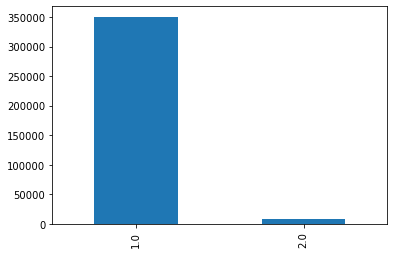

In [156]:
common_way = tripdata_df['trip_type'].value_counts().head()

common_way.plot(kind='bar')


<AxesSubplot:>

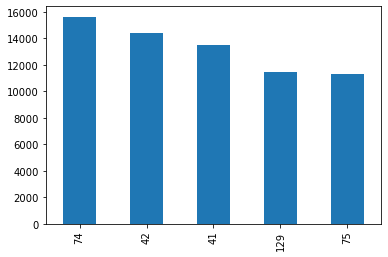

In [157]:
top_dropoff = tripdata_df['DOLocationID'].value_counts().head(5)

top_dropoff.plot(kind='bar')

In [ ]:
# The first graph compares the most common way where New Yorkers request a cab and 1.0 represents a Street Hail and a 
# 2.0 represents a Dispatch. It seems like there the Street Hail is way more popular than the Dispatch. 
# The second graph compares the top 5 most common drop off location. The most common taxizone happens to be 74 and 
# and the least common happens to be either 129 or 75. 

## 9. Findings (2 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

In [158]:
# No, this data is not a viable source that can be used by my team in the future to understand how New Yorkers use 
# taxis because there was a majority of null / negative values throughout the dataset that had to be removed. 
# There was also frequent rows/columns that had 90725 null values in it. 